In [1]:
import numpy as np
import pandas as pd

In [2]:
def sortTitrationSpace(table): 
    
    '''
    This function loads the titration results table from Sim4Life, and sorts it such that the splines and fascicles are in numerical order
    '''
    
    fascicles = []
    splines = []
    
    for column in table.columns:
                
        fasc = column.split('_')[0]
        
        try: # Get fascicle and spline name from column name
            fasc = int(fasc.split(' ')[-1])
            fascicles.append(fasc)
            spline = column.split(' [')[0].split('_')[-1]
            splines.append(int(spline))
        except: # Fasicle 0 is just called Fascicle_, not Fascicle_i like the other ones
            fascicles.append(0)
            spline = column.split(' [')[0].split('_')[-1]
            splines.append(int(spline))

    fascicles = np.array(fascicles)
    splines = np.array(splines)

    indices = np.lexsort((splines,fascicles))
    
    return table.iloc[:,indices]


In [6]:
titrationFactorsUaff = sortTitrationSpace(pd.read_excel('/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/Data/TitrationGoodConductivity_Standoff_Sideways_Unmyelinated_HighConductivity.xlsx',index_col=0))



In [13]:
titrationFactorsUaff.iloc[-1,:50].values*28

array([2996, 521.5, 1708, 1820, 1428, 2254.0, 1876, 2632, 3528, 2310.0,
       1001.0, 1610.0, 2436, 1050.0, 633.5, 689.5, 3472, 2646.0, 2968,
       1267.0, 2226.0, 1792, 1540, 1876, 735.0, 2268, 2800, 1288, 3388,
       2506.0, 2044, 2646.0, 819.0, 2394.0, 605.5, 1904, 2464, 465.5,
       3472, 1141.0, 385.0, 1834.0, 3472, 686.0, 1225.0, 819.0, 2324,
       2772, 1141.0, 1442.0], dtype=object)

In [3]:
ueffvals = np.loadtxt('/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/Data/ueffvals.csv',delimiter=',')

In [28]:
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from math import gamma

def gammaDist(x,k,theta):
    
    return 1 / (gamma(k)*theta**k) * x**(k-1)*np.exp(-x/theta)

def prob(d, vals,smooth):
    
    binSizeSamples = np.diff(d)[0]
    
    empiricalDiams = vals[:,0]*1e-6 # From um to m
    empiricalProbs = vals[:,1]*0.01 # From percentage to fraction
    
    binSizeData = np.diff(empiricalDiams)[0] # Taking the first element ignores sloppy digitization towards the far end
    
    binRatio = binSizeSamples/binSizeData
    
    interp = interp1d(empiricalDiams,empiricalProbs,bounds_error=False,fill_value='extrapolate')
    
    interpD = interp(d)
    
    interpD[np.where(interpD<0)]=0
    
    if smooth:
        
        params = curve_fit(gammaDist,d*1e6,interpD*10,p0=[9,0.5])
        
        interpD = gammaDist(d*1e6,params[0][0],params[0][1]) * 0.1
    
#         N = 5
#         empiricalDiams = np.convolve(empiricalDiams, np.ones(N)/N, mode='valid')
#         empiricalProbs = np.convolve(empiricalProbs, np.ones(N)/N, mode='valid')
    
                      
    return interpD * binRatio

In [29]:
v = prob(np.linspace(0.1,5)*1e-6,ueffvals,True)

In [20]:
v

array([1.56943771e-07, 1.30752845e-05, 1.45933679e-04, 7.15211393e-04,
       2.23287352e-03, 5.24101039e-03, 1.01036505e-02, 1.68643702e-02,
       2.52157466e-02, 3.45681423e-02, 4.41754934e-02, 5.32725092e-02,
       6.11896132e-02, 6.74283698e-02, 7.16944075e-02, 7.38942571e-02,
       7.41069500e-02, 7.25418463e-02, 6.94924637e-02, 6.52933616e-02,
       6.02843144e-02, 5.47836053e-02, 4.90705079e-02, 4.33759068e-02,
       3.78794429e-02, 3.27114154e-02, 2.79577810e-02, 2.36668524e-02,
       1.98566124e-02, 1.65218751e-02, 1.36408002e-02, 1.11804931e-02,
       9.10158712e-03, 7.36182387e-03, 5.91871576e-03, 4.73141783e-03,
       3.76194720e-03, 2.97588826e-03, 2.34270867e-03, 1.83579487e-03,
       1.43229606e-03, 1.11284752e-03, 8.61227211e-04, 6.63984837e-04,
       5.10071093e-04, 3.90484967e-04, 2.97950050e-04, 2.26625381e-04,
       1.71852653e-04, 1.29939077e-04])

<IPython.core.display.Javascript object>


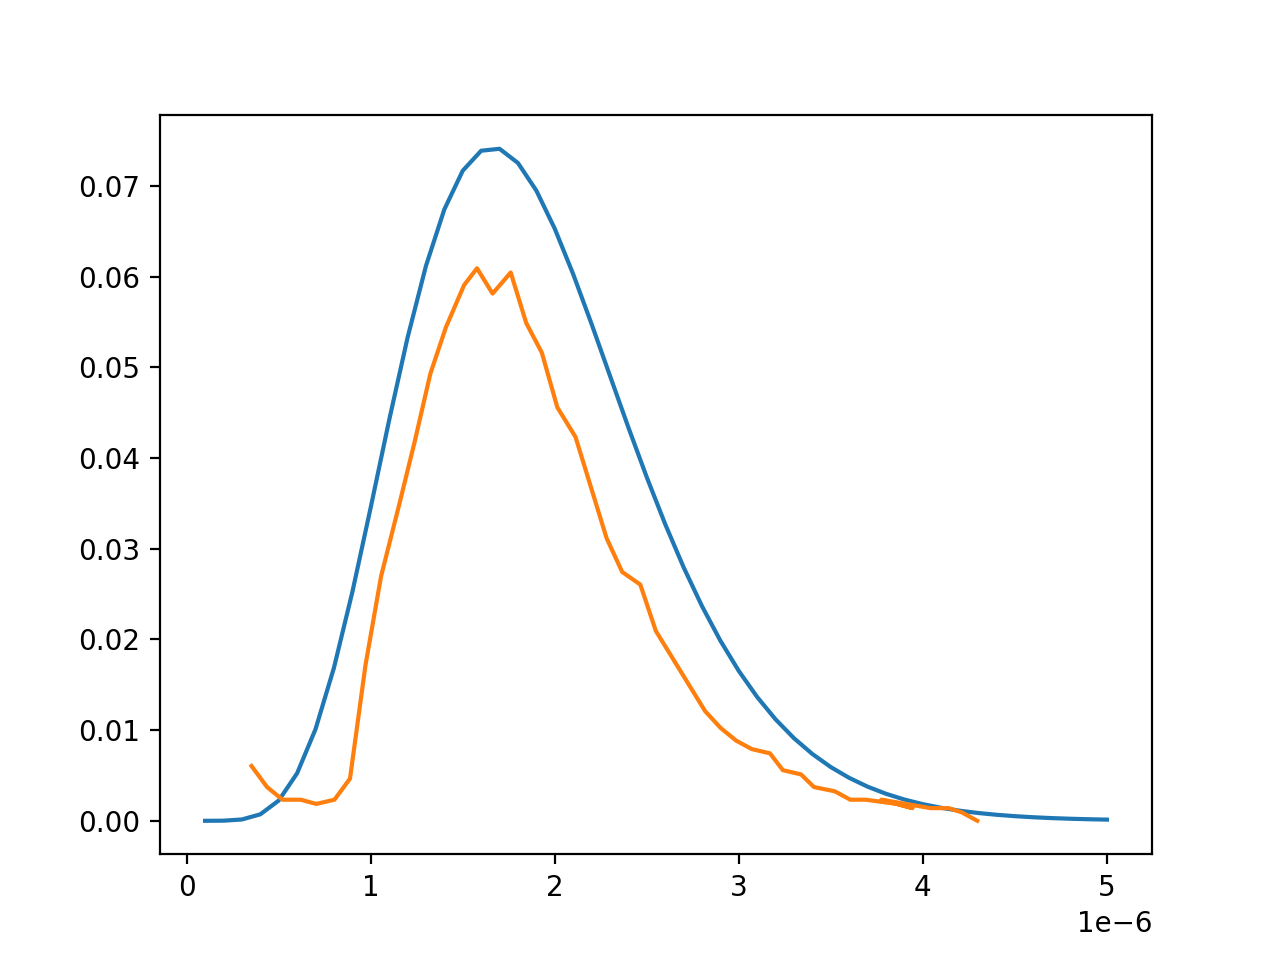

In [30]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.figure()
plt.plot(np.linspace(0.1,5)*1e-6,v)
plt.plot(ueffvals[:,0]*1e-6,ueffvals[:,1]*0.01)

In [23]:
ueffvals

array([[0.35211268, 0.60465116],
       [0.43661972, 0.37209302],
       [0.52112676, 0.23255814],
       [0.61971831, 0.23255814],
       [0.70422535, 0.18604651],
       [0.8028169 , 0.23255814],
       [0.88732394, 0.46511628],
       [0.97183099, 1.72093023],
       [1.05633803, 2.69767442],
       [1.15492958, 3.48837209],
       [1.23943662, 4.18604651],
       [1.32394366, 4.93023256],
       [1.4084507 , 5.44186047],
       [1.50704225, 5.90697674],
       [1.57746479, 6.09302326],
       [1.66197183, 5.81395349],
       [1.76056338, 6.04651163],
       [1.84507042, 5.48837209],
       [1.92957746, 5.1627907 ],
       [2.01408451, 4.55813953],
       [2.11267606, 4.23255814],
       [2.1971831 , 3.6744186 ],
       [2.28169014, 3.11627907],
       [2.36619718, 2.74418605],
       [2.46478873, 2.60465116],
       [2.54929577, 2.09302326],
       [2.63380282, 1.81395349],
       [2.71830986, 1.53488372],
       [2.81690141, 1.20930233],
       [2.90140845, 1.02325581],
       [2.